In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [164]:
data=pd.read_csv("zomato.csv")

In [165]:
data.shape

(51717, 17)

In [166]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [167]:
#data cleaning
#rename complex named columns for easy understanding
data.rename(columns = {'approx_cost(for two people)' : 'approx_cost','listed_in(city)' : 'area'}, inplace = True)

In [168]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'], axis = 1, inplace = True)

In [169]:
df=data

In [170]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [172]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [173]:
#lets replace null values
df['rate'] = df['rate'].str.replace("/5","")
df['rate'] = df['rate'].str.replace("nan","NaN")
df['rate'] = df['rate'].str.replace("NEW","NaN")
df['rate'] = df['rate'].str.replace("-","NaN")
df['rate'] = df['rate'].str.replace("/5","")
df['rate'] = df['rate'].fillna(np.nan)
df['rate'] = df['rate'].str.replace(" ","")

In [174]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [175]:
#check for approx_cost column
#unique values
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [176]:
df['approx_cost'] = df['approx_cost'].str.replace("nan","NaN")
df['approx_cost'] = df['approx_cost'].fillna('NaN')
df['approx_cost'] = df['approx_cost'].str.replace(",","")

In [177]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [178]:
#change the data type from object to float
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [180]:
#data description in stastics as 5 number summary
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [181]:
#checking for null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [182]:
#check for the percentage of null values
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

In [183]:
#lets drop the values that have less null values that is location,rest-type,cuisines,approx_cost
df = df[df["location"].notna()]
df = df[df["rest_type"].notna()]
df = df[df["cuisines"].notna()]
df = df[df["approx_cost"].notna()]

In [184]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

In [185]:
#let's handle the null values in rate column
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [186]:
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)

xyz = q3 - q1
lower_range = q1 - (1.5*xyz)
upper_range = q3 + (1.5*xyz)
outliers = len(df[(df['rate']<lower_range) | (df['rate'] > upper_range)])
print("number of rows having outliers : ",outliers)

number of rows having outliers :  183


In [187]:
#now we'll impute median
df['rate'] = df['rate'].fillna(df['rate'].median())

df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [188]:
#lets check for the numerical values
Numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
print("There are {} numerical features and their names are {}".format(len(Numerical_features), Numerical_features))

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


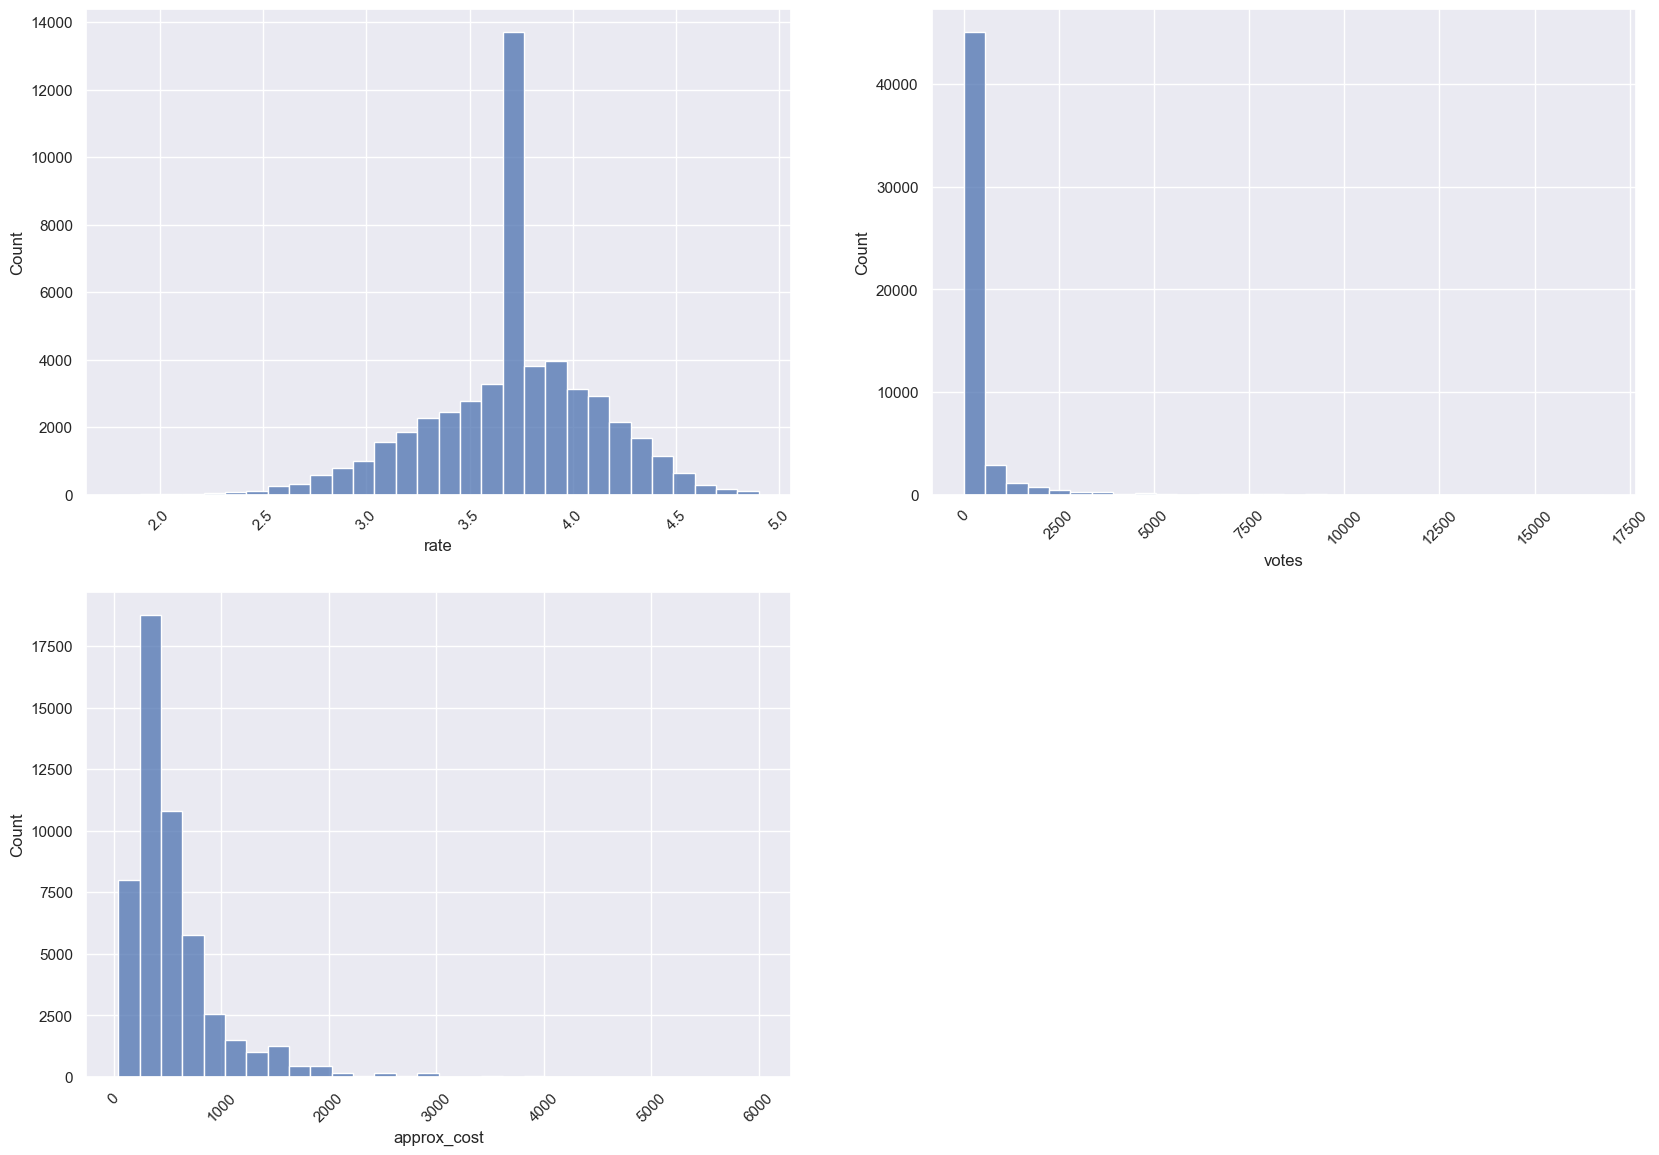

In [189]:
plt.figure(figsize=(20,150))
for i in enumerate (Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df, x=i[1],bins=30)
    plt.xticks(rotation=45)

In [190]:
#reset the indexing
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

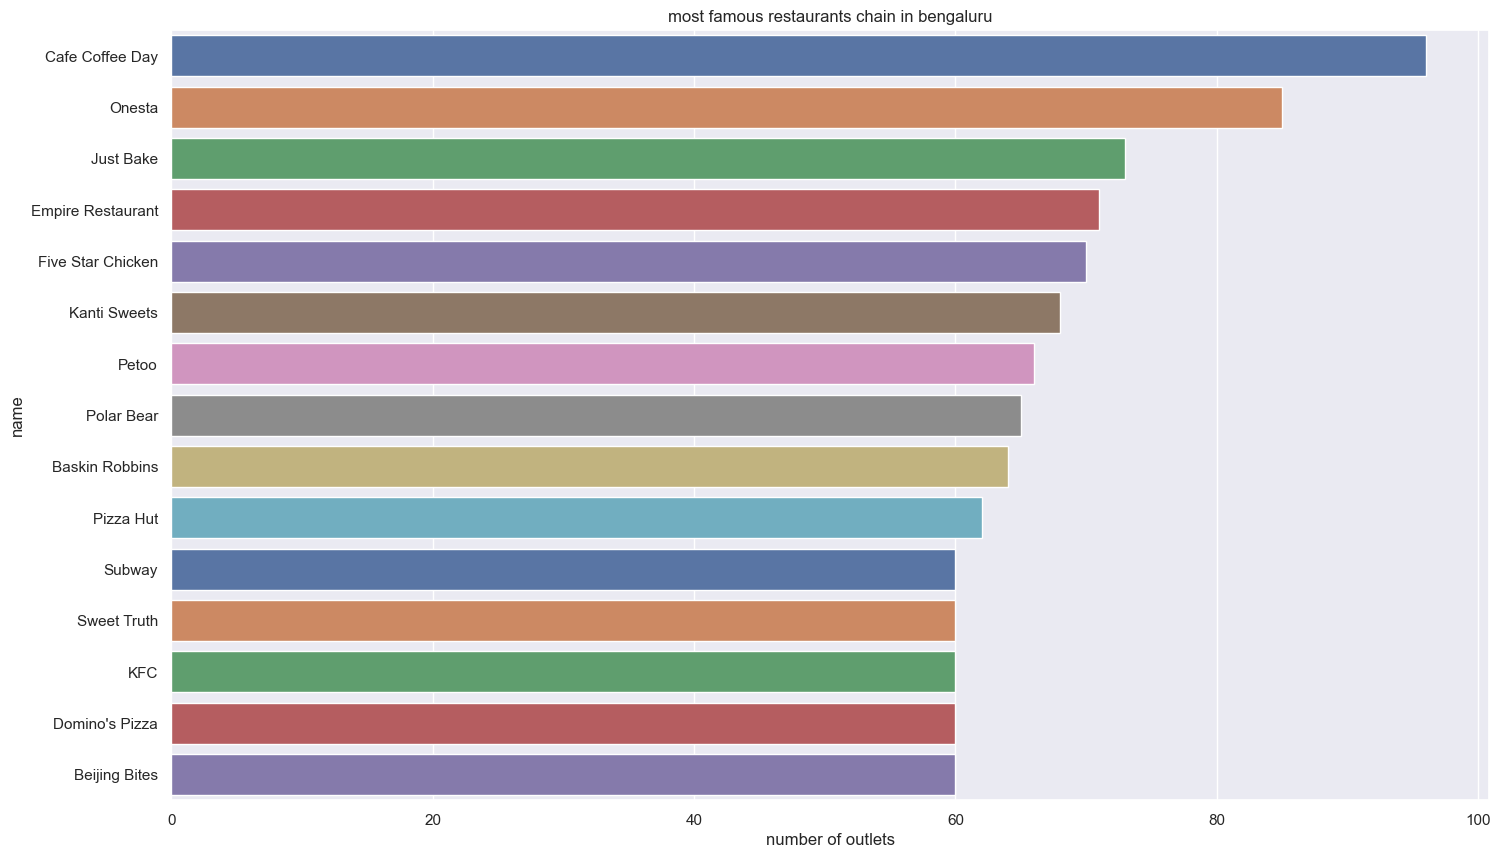

In [191]:
# check the most famous restaurant chains in Bengaluru
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette="deep")
plt.title("most famous restaurants chain in bengaluru")
plt.xlabel("number of outlets")
plt.show()

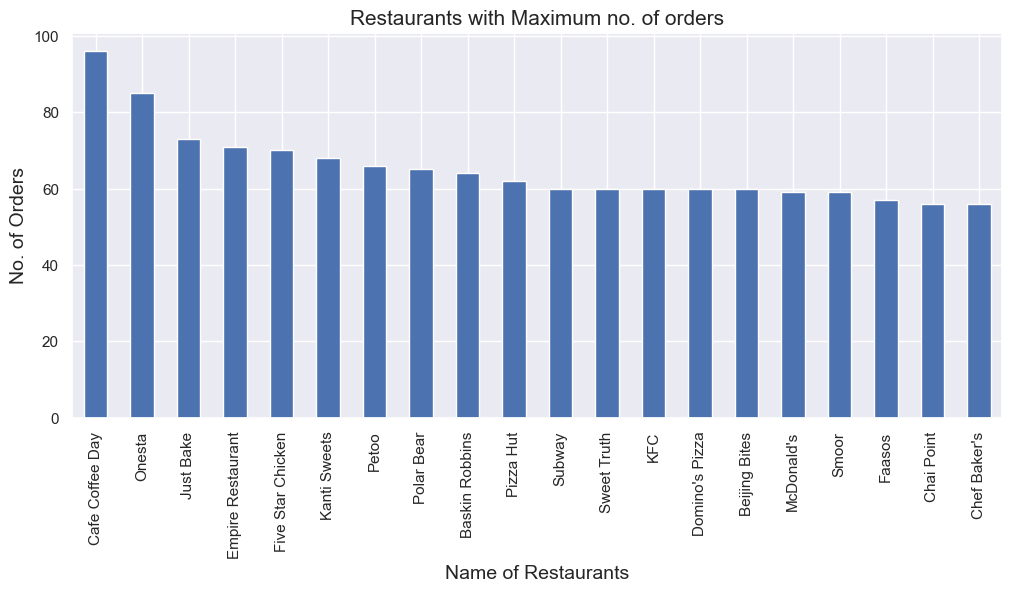

In [192]:
#check which resto get max number of orders
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:20]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants',size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum no. of orders",fontsize=15)
plt.show()


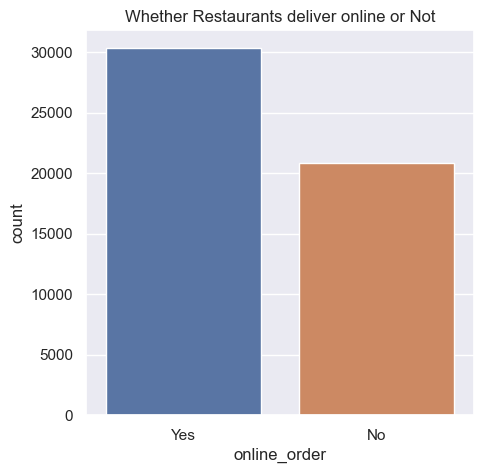

In [193]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaurants deliver online or Not")
plt.show()


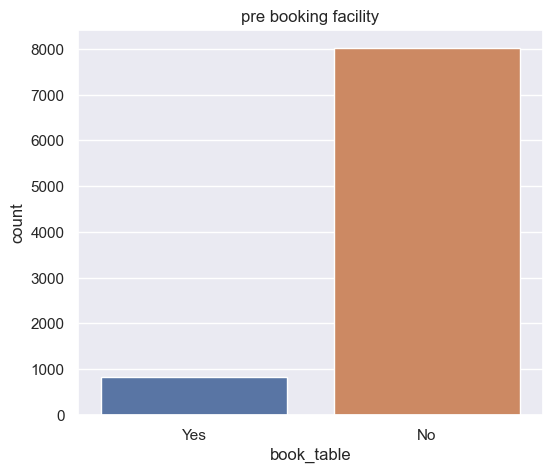

In [194]:
#check how many resto offer prebookoing tables
data = df[['name','book_table']].drop_duplicates()

plt.figure(figsize = (6,5))
fx = sns.countplot(x="book_table", data=data).set_title('pre booking facility',fontsize = 12)
plt.show()


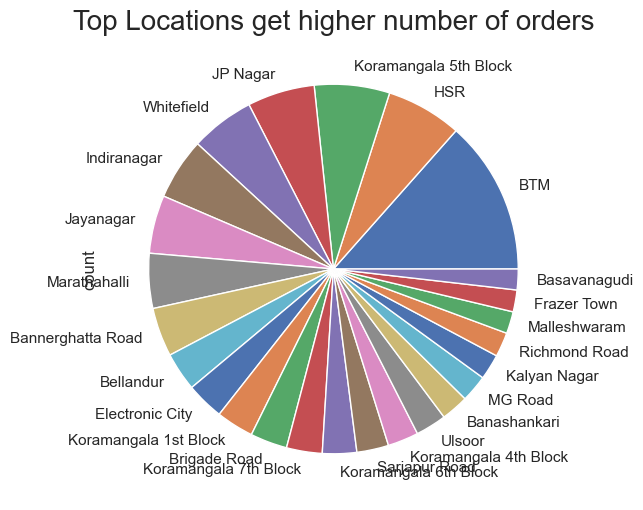

In [195]:
#locations which have highest orders
plt.figure(figsize = (12,6))
data = df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title('Top Locations get higher number of orders',size = 20)
plt.show()

<Axes: xlabel='rate', ylabel='Density'>

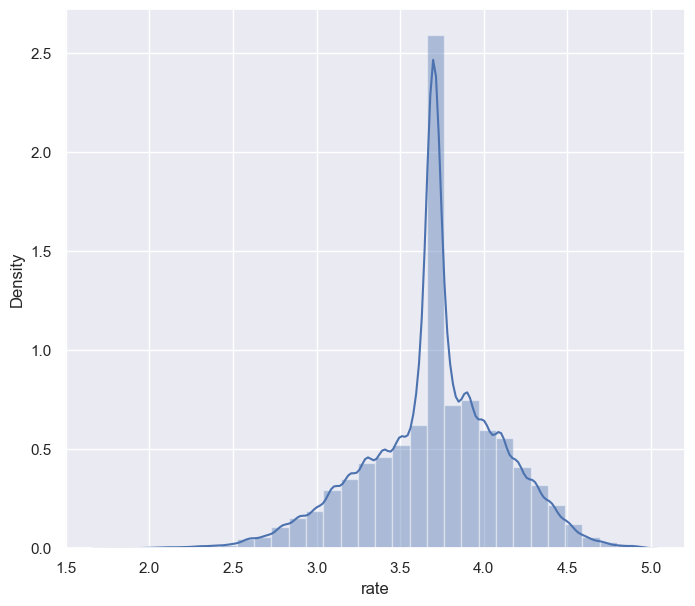

In [196]:
#The most common ratings for the orders
plt.figure(figsize=(8,7))

sns.distplot(df['rate'],bins=30)

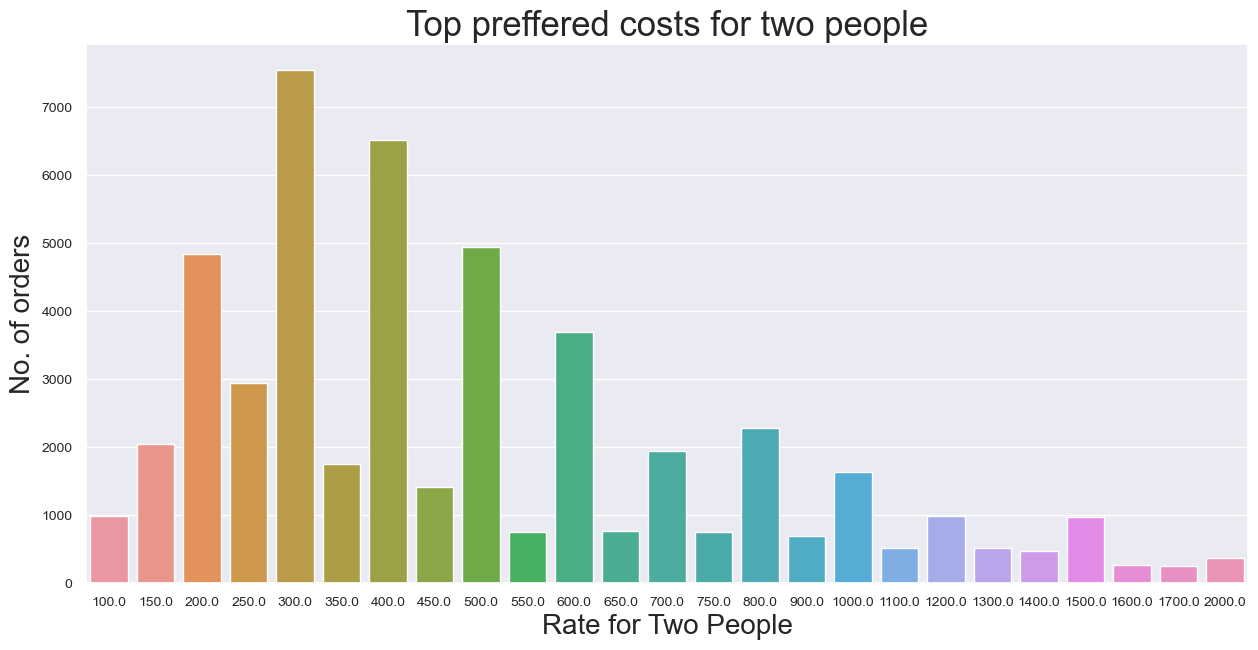

In [197]:
#check for the common
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost','count']
data = data.set_index('approx_cost')
plt.figure(figsize = (15,7))
sns.barplot(x = data.index, y=data['count'])
plt.xlabel('Rate for Two People', size=20)
plt.ylabel('No. of orders',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preffered costs for two people',size = 25)
plt.show()

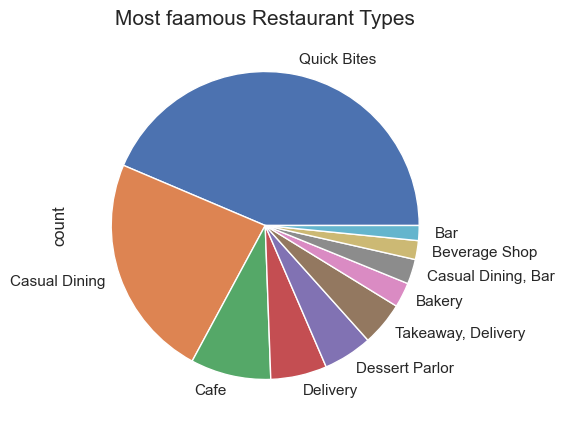

In [198]:
#Top 10 types of orders
plt.figure(figsize=(12,5))
abc = df.rest_type.value_counts()[:10]
abc.plot(kind = 'pie')
plt.title("Most faamous Restaurant Types",fontsize=15)
plt.show()

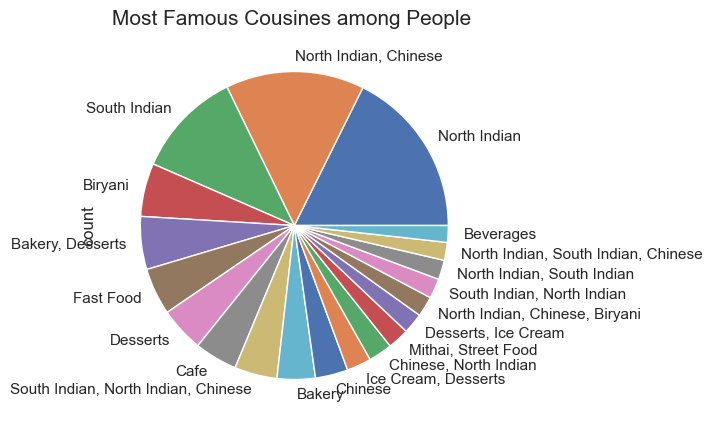

In [199]:
#let's checkl famous cusines 
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most Famous Cousines among People ",fontsize=15)
plt.show()

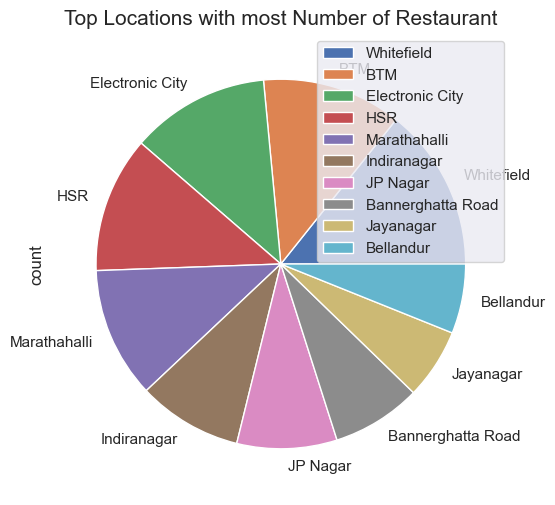

In [200]:
#check for top locations with most number of restaurants
loc = pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by='count',ascending = False, inplace=True)
plt.rcParams['figure.figsize'] = (8,6)
ax = loc[:10].plot(kind='pie',subplots = True)
plt.title('Top Locations with most Number of Restaurant',size = 15)
plt.show()


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

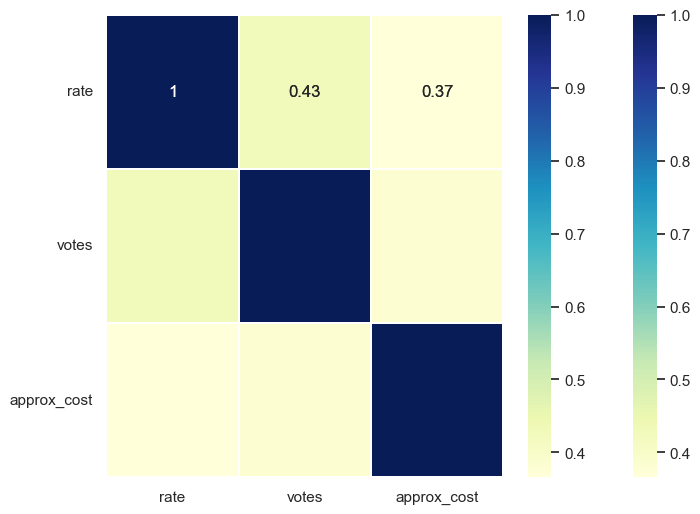

In [201]:
#let's find the relationship between features
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

In [202]:
#let's convert catagorical variables into numeric format
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [203]:
df.book_table[df.book_table == 'Yes'] = 1
df.book_table[df.book_table == 'No'] = 0
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [204]:
#for the rest type column
#one hot encoding
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Takeaway,Dhaba,Bakery,Sweet Shop,Bar,Pub,Irani Cafee,Cafe,Bhojanalya,...,Meat Shop,Food Court,Food Truck,Beverage Shop,Dessert Parlor,Lounge,Casual Dining,Quick Bites,Kiosk,Confectionery
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [206]:
rest_df.head()

,rest_type,Takeaway,Dhaba,Bakery,Sweet Shop,Bar,Pub,Irani Cafee,Cafe,Bhojanalya,...,Meat Shop,Food Court,Food Truck,Beverage Shop,Dessert Parlor,Lounge,Casual Dining,Quick Bites,Kiosk,Confectionery
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [207]:
rest_df.drop(['rest_type'], axis = 1, inplace=True)
rest_df.head()

,Takeaway,Dhaba,Bakery,Sweet Shop,Bar,Pub,Irani Cafee,Cafe,Bhojanalya,Mess,...,Meat Shop,Food Court,Food Truck,Beverage Shop,Dessert Parlor,Lounge,Casual Dining,Quick Bites,Kiosk,Confectionery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [208]:
#for "cuisines column"
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Asian,Assamese,Bengali,Gujarati,Jewish,Mongolian,Finger Food,Indian,Thai,...,Korean,Roast Chicken,Oriya,Desserts,Australian,Cantonese,South Indian,Fast Food,Sushi,Hot dogs
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Asian,Assamese,Bengali,Gujarati,Jewish,Mongolian,Finger Food,Indian,Thai,...,Korean,Roast Chicken,Oriya,Desserts,Australian,Cantonese,South Indian,Fast Food,Sushi,Hot dogs
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Asian,Assamese,Bengali,Gujarati,Jewish,Mongolian,Finger Food,Indian,Thai,Konkan,...,Korean,Roast Chicken,Oriya,Desserts,Australian,Cantonese,South Indian,Fast Food,Sushi,Hot dogs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
#for the locatiom column
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [212]:
area_df = df['location']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [213]:
#concatination
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


In [215]:
#let's do the feature selection
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()




data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')
